In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta

In [8]:
data = yf.download(tickers = '^RUI', start = "2014-05-31", end = "2024-05-31")

[*********************100%%**********************]  1 of 1 completed


In [9]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-02,1072.819946,1073.650024,1067.650024,1073.150024,1073.150024,0
2014-06-03,1071.589966,1073.219971,1069.609985,1072.770020,1072.770020,0
2014-06-04,1071.329956,1075.400024,1069.540039,1075.069946,1075.069946,0
2014-06-05,1075.650024,1083.000000,1072.300049,1082.280029,1082.280029,0
2014-06-06,1083.800049,1087.359985,1083.800049,1087.310059,1087.310059,0


In [10]:
data['RSI'] = ta.rsi(data.Close, length = 15)
data['EMAF'] = ta.ema(data.Close, length = 20)
data['EMAM'] = ta.ema(data.Close, length = 100)
data['EMAS'] = ta.ema(data.Close, length = 150)

#data['Target'] = data['Adj Close'] - data.Open
#data['Target'] = data['Target'].shift(-1)

#data['TargetClass'] = [1 if data.Target[i]> 0 else 0 for i in range(len(data))].copy()
data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace = True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis = 1, inplace = True)


In [11]:
data

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,TargetNextClose
0,1140.489990,1140.489990,1121.479980,1123.369995,43.559752,1140.343542,1119.216000,1105.590334,1113.310059
1,1125.050049,1128.329956,1107.339966,1113.310059,39.889983,1137.768925,1119.099051,1105.692582,1126.280029
2,1117.300049,1127.969971,1117.300049,1126.280029,46.156078,1136.674744,1119.241248,1105.965263,1146.209961
3,1130.420044,1147.189941,1130.420044,1146.209961,54.043377,1137.582860,1119.775282,1106.498305,1136.719971
4,1147.310059,1147.319946,1133.089966,1136.719971,50.285379,1137.500680,1120.110821,1106.898592,1127.910034
...,...,...,...,...,...,...,...,...,...
2361,2910.820068,2912.600098,2892.169922,2903.159912,64.886256,2859.308617,2758.045638,2696.460424,2879.699951
2362,2910.179932,2920.850098,2874.179932,2879.699951,57.830792,2861.250649,2760.454634,2698.887438,2899.870117
2363,2888.129883,2903.419922,2885.489990,2899.870117,61.670124,2864.928694,2763.215337,2701.549460,2898.449951
2364,2906.330078,2906.330078,2885.520020,2898.449951,61.249441,2868.121194,2765.893250,2704.157413,2876.280029


In [12]:
data_set = data.iloc[:,0:11]
pd.set_option('display.max_columns', None)

In [13]:
data_set

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,TargetNextClose
0,1140.489990,1140.489990,1121.479980,1123.369995,43.559752,1140.343542,1119.216000,1105.590334,1113.310059
1,1125.050049,1128.329956,1107.339966,1113.310059,39.889983,1137.768925,1119.099051,1105.692582,1126.280029
2,1117.300049,1127.969971,1117.300049,1126.280029,46.156078,1136.674744,1119.241248,1105.965263,1146.209961
3,1130.420044,1147.189941,1130.420044,1146.209961,54.043377,1137.582860,1119.775282,1106.498305,1136.719971
4,1147.310059,1147.319946,1133.089966,1136.719971,50.285379,1137.500680,1120.110821,1106.898592,1127.910034
...,...,...,...,...,...,...,...,...,...
2361,2910.820068,2912.600098,2892.169922,2903.159912,64.886256,2859.308617,2758.045638,2696.460424,2879.699951
2362,2910.179932,2920.850098,2874.179932,2879.699951,57.830792,2861.250649,2760.454634,2698.887438,2899.870117
2363,2888.129883,2903.419922,2885.489990,2899.870117,61.670124,2864.928694,2763.215337,2701.549460,2898.449951
2364,2906.330078,2906.330078,2885.520020,2898.449951,61.249441,2868.121194,2765.893250,2704.157413,2876.280029


In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.07022923 0.06525116 0.06600693 ... 0.01631279 0.00131246 0.05635032]
 [0.06212023 0.05886673 0.05859536 ... 0.01624302 0.00137624 0.0631541 ]
 [0.05804996 0.05867773 0.06381599 ... 0.01632786 0.00154635 0.07360892]
 ...
 [0.9880832  0.99084857 0.99062291 ... 0.99709834 0.9969508  0.99279754]
 [0.99764187 0.9923765  0.99063865 ... 0.99869594 0.99857777 0.98116766]
 [0.98827758 0.98301511 0.98471566 ... 1.         1.         0.97321508]]


In [16]:
X = []

backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i-backcandles:i,j])

X = np.moveaxis(X, [0], [2])

X, yi = np.array(X), np.array(data_set_scaled[backcandles:,-1])
#X, yi = np.array(X), np.array(data_set_scaled[backcandles:,-3])
y = np.reshape(yi, (len(yi),1))

print(X.shape)
print(y.shape)


2366
(2336, 30, 8)
(2336, 1)


In [17]:
splitlimit = int(len(X) * 0.8)
print(splitlimit)

1868


In [18]:
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit],y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

(1868, 30, 8)
(468, 30, 8)
(1868, 1)
(468, 1)
[[0.08599423]
 [0.08988138]
 [0.08965059]
 ...
 [0.57536366]
 [0.60613555]
 [0.61460746]]


In [19]:
y_train

array([[0.08599423],
       [0.08988138],
       [0.08965059],
       ...,
       [0.57536366],
       [0.60613555],
       [0.61460746]])

In [20]:
from keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
#from keras.models import Dropout
#from keras.models import Dense
from tensorflow.keras.layers import TimeDistributed
#from keras.models import TimeDistributed


In [21]:
import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation,  concatenate


In [22]:
lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name = 'first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss = 'mse')
model.fit(x = X_train, y = y_train, batch_size = 15, epochs = 30, shuffle = True, validation_split = 0.1)


Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0232 - val_loss: 0.0028
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.9060e-04 - val_loss: 0.0017
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.8314e-04 - val_loss: 0.0029
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.1643e-04 - val_loss: 0.0031
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.1562e-04 - val_loss: 0.0010
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.2386e-04 - val_loss: 0.0013
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.4108e-04 - val_loss: 0.0013
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.8517e-04 - val_loss: 0.0020
Epoch 9/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7342e-04 - val_loss: 0.0023
Epoch 10/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.4669e-04 - val_loss: 9.9316e-04
Epoch 11/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0800e-04 - val_loss: 9.26

In [23]:
y_pred = model.predict(X_test)
for i in range(10):
    print(y_pred[i], y_test[i])

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[0.6007685] [0.62571801]
[0.61293304] [0.61394123]
[0.6227532] [0.61527368]
[0.620895] [0.60116768]
[0.62168235] [0.63087991]
[0.6132455] [0.64527433]
[0.6267593] [0.66160455]
[0.63956946] [0.65877175]
[0.6547161] [0.65187883]
[0.66003823] [0.67095771]


In [24]:
import matplotlib.pyplot as plt

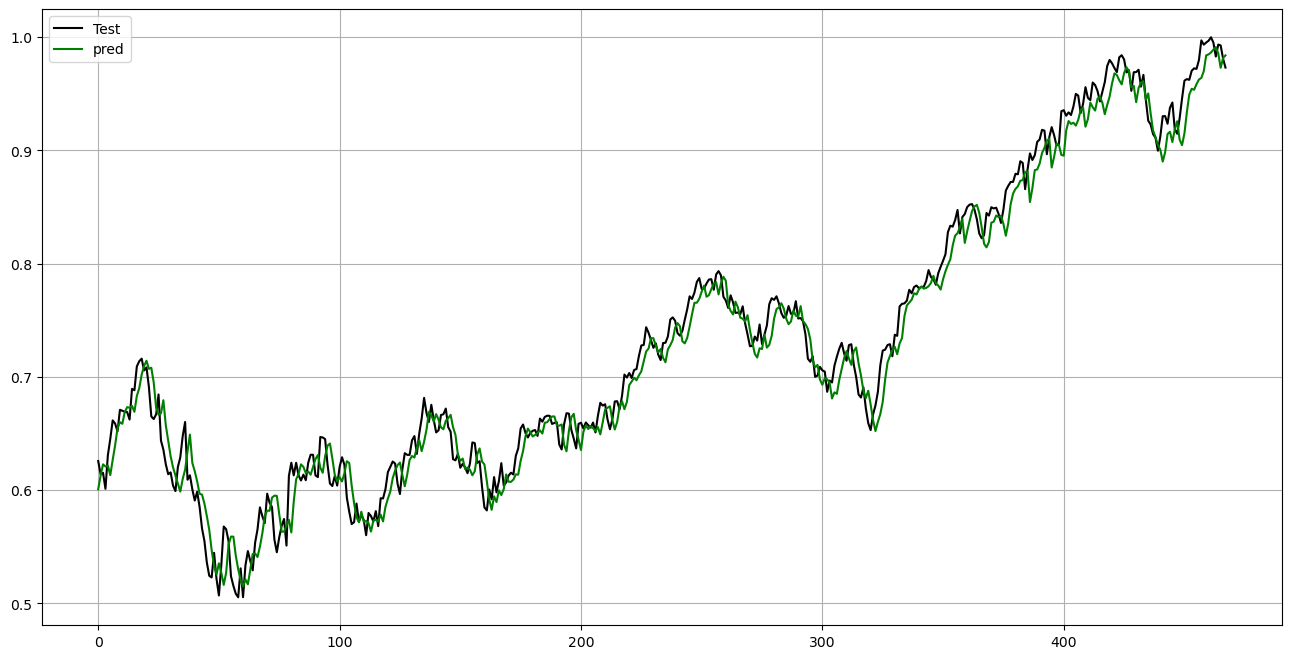

In [25]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.grid()
plt.show()
